<a href="https://colab.research.google.com/github/niukun000/CMPT332/blob/master/Copy_of_SGA_coding_questions_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

Write a function `get_last_element` to return the last element of a list. For example, `get_last_element`$([1,2,3]) = 3$.

In [2]:
import numpy as np

In [3]:
# Solution goes here:
def get_last_element(arr):
  return arr[-1]

In [4]:
# Test case:
in_array = np.random.randn(5)

print(in_array, '\n')
print(get_last_element(in_array))

[ 0.38239454  2.26696629  1.08334976 -1.12901312  0.73477147] 

0.734771472682955


# Question 2
Given the array nums, for each nums[i] find out how many numbers in the array are *strictly smaller* than it.

```
Input: nums = [8,1,2,2,3]
Output: [4,0,1,1,3]
Explanation: 
For nums[0]=8 there exist four smaller numbers than it (1, 2, 2 and 3). 
For nums[1]=1 does not exist any smaller number than it.
For nums[2]=2 there exist one smaller number than it (1). 
For nums[3]=2 there exist one smaller number than it (1). 
For nums[4]=3 there exist three smaller numbers than it (1, 2 and 2).
```



In [9]:
# Solution goes here:
def get_smaller_counts(nums):
    L = []
    count = 0
    for i in nums:
      for j in nums:
        if j < i:
          count +=1
      L.append(count)
      count = 0
    return L
      

In [10]:
# Test case:
in_arr = [8, 1, 2, 2, 3]
get_smaller_counts(in_arr)

[4, 0, 1, 1, 3]

# Question 3

Given an array of integers and an integer target, return indices of the two numbers such that they add up to target.

Example:
* Input: nums = [2, 7, 11, 15], target = 9
* Output:  [0, 1]
* Explain: nums[0] + nums[1] = 9


In [25]:
# Solution goes here:
def get_sum_indices(arr, target):
  
  for i in range(len(arr)):
    for j in range(i+1, len(arr)):
      if arr[i]+arr[j]==target:
        return [i, j]
      


In [26]:
# Test case:
in_arr = [2, 7, 11, 15]
print(get_sum_indices(in_arr, target=13))
print(get_sum_indices(in_arr, target=22))
print(get_sum_indices(in_arr, target=12))

[0, 2]
[1, 3]
None


# **DATA SCIENCE**

# Question 4
Vectorize the following function using NumPy.



In [ ]:
def square_of_sums(a, b):
    assert len(a) == len(b)
    
    out = []
    for i in range(len(a)):
        result = (a[i] + b[i]) ** 2
        out.append(result)

    return out

In [ ]:
a_array = [2, 5, 4, 8, 3]
b_array = [8, 4, 3, 6, 7]

square_of_sums(a_array, b_array)

[100, 81, 49, 196, 100]

In [13]:
# Solution goes here:
def vectorized_square_of_sums(a, b):
    result = a+b
    result = np.power(result, 2)
    return result

In [14]:
# Test case:
a_ndarray = np.array([2, 5, 4, 8, 3])
b_ndarray = np.array([8, 4, 3, 6, 7])

vectorized_square_of_sums(a_ndarray, b_ndarray)

array([100,  81,  49, 196, 100])

# Question 5

Given a n-dimensional array (ndarray or tensor) $X$ where $n\geq1$ integer, and a threshold $\tau \in \mathbb{R}$, write a function denoted by `replace_with_thresh` to replace all values of $X$ that are strictly greater than $\tau$, otherwise keep the same as it is.

<br>

For example, if $X = [5,1,4,2,3]$ and $\tau = 3$, then `replace_with_thresh` returns $[3,1,3,2,3]$. Moreover, if $X = \begin{bmatrix}-1&2\\2&-1\end{bmatrix}$ and $\tau = 0$, then `replace_with_thresh` returns $\begin{bmatrix}-1&0\\0&-1\end{bmatrix}$.

In [58]:
# Solution goes here:
def replace_with_thresh(arr, thresh):
    arr[arr>thresh] = thresh

In [61]:
# Test case:
in_array = np.random.randint(1, 100, (3, 5))

# print(in_array, '\n')
replace_with_thresh(in_array, thresh=30)
print(in_array)

[[30 30  3 30 22]
 [30  3 30 30 30]
 [30 14 30 30 25]]


# **MACHINE LEARNING**

# Question 6

In [19]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
height, width = train_images.shape[1], train_images.shape[2]

170508288/170498071 [==============================] - 2s 0us/step


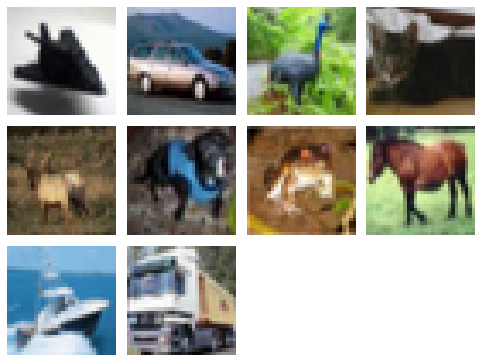

In [20]:
import matplotlib.pyplot as plt

# visualizing the training set.
n_classes = 10
scale = 1.7
nrows, ncols = 4, 4
figsize = (ncols * scale, nrows * scale)
_, axs = plt.subplots(nrows, ncols, figsize=figsize)
axs = axs.flatten()

for i in range(n_classes):
    axs[i].imshow(train_images[train_labels.flatten() == i][0])
    axs[i].axis('off')
for i in range(n_classes, nrows * ncols):
    axs[i].remove()
    
plt.tight_layout()
plt.show()

In [21]:
from tensorflow.keras.utils import to_categorical

train_images, train_labels = train_images[:5000], to_categorical(train_labels[:5000])
test_images, test_labels = test_images[:1000], to_categorical(test_labels[:1000])

train_images.shape, train_labels.shape

((5000, 32, 32, 3), (5000, 10))

## Identify the three mistakes in the following code:

In [62]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

def get_cnn():
    cnn_model = models.Sequential()

    cnn_model.add(layers.Conv2D(32, (3, 3), 
                                activation='relu', 
                                input_shape=(height, width, 3)))
    cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    
    cnn_model.add(layers.MaxPooling2D((2, 2)))

    cnn_model.add(layers.Flatten())
    cnn_model.add(layers.Dense(64, activation='relu'))
    cnn_model.add(layers.Dense(32, activation='relu'))  # Classification layer

    cnn_model.compile(optimizer=tf.keras.optimizers.SGD(1e-4),  # Stochastic Gradient Descent
                      loss='mse',  # Mean Squared Error
                      metrics=['accuracy'])

    return cnn_model

cnn_model = get_cnn()
cnn_model.fit(train_images, 
              train_labels, 
              epochs=10, 
              batch_size=64, 
              validation_split=0.8)

Epoch 1/10


ValueError: ignored

In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)
print("test_loss: %s, test_acc: %s" % (
    np.round(test_loss,3), np.round(test_acc,3)))

## When training `cnn_model` with small hyperparameters, what would be the expected initial loss without regularization?